In [1]:
import matplotlib.pyplot as plt
import seaborn as sbs

import random
import math
import numpy as np
from numpy import array

import copy

import sys, os, time

from qinfer import LiuWestResampler
from qinfer import utils

from qiskit import IBMQ
from qiskit import QuantumCircuit, execute, Aer
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

IBMQ.load_account()

from qinfer import FiniteOutcomeModel, DifferentiableModel
from qinfer.smc import SMCUpdater

sbs.set(style="darkgrid")

import matplotlib.lines as mlines
%matplotlib inline

Failed to import duecredit due to No module named 'duecredit'
/home/alan/aur/miniconda3/lib/python3.8/site-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "
/home/alan/aur/miniconda3/lib/python3.8/site-packages/qinfer/parallel.py:61: UserWarning: Could not import IPython parallel. Parallelization support will be disabled.
  warnings.warn(


In [2]:
def design_circuit(n_qubits, inv_arr):
    circuit = QuantumCircuit(n_qubits, n_qubits)
    for i, element in enumerate(inv_arr):
        if element == 1:
            circuit.barrier(i)
            circuit.x(i)
            circuit.barrier(i)
    
    circuit.measure(list(range(n_qubits)), list(range(n_qubits)))
    return circuit

In [3]:
provider = IBMQ.get_provider(group='open', project='main')
backend = provider.get_backend('ibmq_5_yorktown')

In [4]:
n_qubits = 5
max_weight = 5

results = []

range_max = 2 ** n_qubits
for i in range(range_max):
    # Slapshod generator for the inversion array
    curr_inversion_arr = list(map(int, list(bin(i)[2:])))
    curr_inversion_arr = [0] * (n_qubits - len(curr_inversion_arr)) + curr_inversion_arr
    curr_inversion_arr = np.array(curr_inversion_arr)
    print(curr_inversion_arr)
    
    if (sum(curr_inversion_arr) > max_weight):
        continue
    
    circuit = design_circuit(n_qubits, curr_inversion_arr)
    
    #try:
    circuit_op_0 = transpile(circuit, backend=backend, optimization_level=0)
    job = execute(circuit_op_0, backend, shots=1000)
    #except:
    #    continue
        
    result = job.result()
    
    results.append([curr_inversion_arr, result.get_counts(circuit_op_0)])

[0 0 0 0 0]
[0 0 0 0 1]
[0 0 0 1 0]
[0 0 0 1 1]
[0 0 1 0 0]


Future exception was never retrieved
future: <Future finished exception=ConnectionClosed('WebSocket connection is closed: code = 4002 (private use), no reason')>
websockets.exceptions.ConnectionClosed: WebSocket connection is closed: code = 4002 (private use), no reason


[0 0 1 0 1]
[0 0 1 1 0]
[0 0 1 1 1]
[0 1 0 0 0]
[0 1 0 0 1]
[0 1 0 1 0]
[0 1 0 1 1]
[0 1 1 0 0]
[0 1 1 0 1]
[0 1 1 1 0]
[0 1 1 1 1]
[1 0 0 0 0]
[1 0 0 0 1]
[1 0 0 1 0]
[1 0 0 1 1]
[1 0 1 0 0]
[1 0 1 0 1]
[1 0 1 1 0]
[1 0 1 1 1]
[1 1 0 0 0]
[1 1 0 0 1]
[1 1 0 1 0]
[1 1 0 1 1]
[1 1 1 0 0]
[1 1 1 0 1]
[1 1 1 1 0]
[1 1 1 1 1]


In [3]:
results = [[array([0, 0, 0, 0, 0]),
  {'00100': 4,
   '00010': 94,
   '10000': 20,
   '01000': 12,
   '10100': 6,
   '11100': 2,
   '00011': 7,
   '00000': 804,
   '01001': 1,
   '01100': 1,
   '00110': 2,
   '00001': 47}],
 [array([0, 0, 0, 0, 1]),
  {'11011': 1,
   '01000': 14,
   '10100': 4,
   '10101': 1,
   '11001': 6,
   '11100': 5,
   '00011': 2,
   '11110': 2,
   '10001': 36,
   '00000': 63,
   '10011': 13,
   '10110': 6,
   '00100': 2,
   '00010': 11,
   '10000': 684,
   '10010': 71,
   '11010': 4,
   '01010': 1,
   '01011': 1,
   '11000': 72,
   '00001': 1}],
 [array([0, 0, 0, 1, 0]),
  {'00100': 1,
   '00010': 7,
   '00001': 6,
   '10000': 5,
   '01000': 683,
   '11100': 6,
   '00011': 1,
   '00000': 46,
   '11010': 4,
   '01011': 11,
   '01110': 6,
   '01001': 70,
   '11000': 16,
   '01100': 9,
   '01010': 129}],
 [array([0, 0, 0, 1, 1]),
  {'10000': 21,
   '11011': 1,
   '01000': 45,
   '11001': 47,
   '11100': 17,
   '11110': 4,
   '10011': 1,
   '00000': 5,
   '10010': 2,
   '11010': 59,
   '01010': 3,
   '01001': 4,
   '11000': 790,
   '01100': 1}],
 [array([0, 0, 1, 0, 0]),
  {'10111': 1,
   '01000': 4,
   '10100': 310,
   '10101': 21,
   '11100': 4,
   '00011': 2,
   '00101': 24,
   '00000': 61,
   '01110': 1,
   '10110': 18,
   '01100': 7,
   '00110': 75,
   '00111': 11,
   '00100': 380,
   '00010': 37,
   '10000': 33,
   '10010': 6,
   '11010': 1,
   '11000': 1,
   '00001': 3}],
 [array([0, 0, 1, 0, 1]),
  {'10111': 8,
   '01000': 1,
   '10100': 586,
   '10101': 26,
   '11001': 1,
   '11100': 102,
   '11110': 11,
   '10001': 6,
   '00101': 3,
   '00000': 9,
   '01110': 2,
   '01101': 1,
   '10011': 3,
   '10110': 106,
   '01100': 14,
   '00110': 10,
   '00111': 2,
   '00100': 22,
   '00010': 3,
   '01111': 1,
   '10000': 30,
   '11101': 7,
   '10010': 28,
   '11010': 4,
   '01010': 1,
   '11000': 11,
   '11111': 2}],
 [array([0, 0, 1, 1, 0]),
  {'01000': 53,
   '10100': 14,
   '11001': 5,
   '11100': 276,
   '11110': 23,
   '00101': 3,
   '00000': 2,
   '01110': 77,
   '01101': 40,
   '01001': 11,
   '10110': 2,
   '01100': 344,
   '00110': 7,
   '00100': 19,
   '00010': 3,
   '01111': 11,
   '10000': 1,
   '11101': 14,
   '11010': 2,
   '01011': 4,
   '11000': 43,
   '01010': 45,
   '11111': 1}],
 [array([0, 0, 1, 1, 1]),
  {'10111': 1,
   '11011': 2,
   '01000': 2,
   '10100': 11,
   '11001': 8,
   '11100': 662,
   '11110': 133,
   '01110': 3,
   '01101': 2,
   '10110': 4,
   '01100': 20,
   '00110': 2,
   '00010': 1,
   '01111': 2,
   '10000': 2,
   '11101': 46,
   '10010': 2,
   '11010': 50,
   '01010': 3,
   '11000': 34,
   '11111': 10}],
 [array([0, 1, 0, 0, 0]),
  {'11011': 1,
   '01000': 2,
   '10101': 1,
   '00011': 88,
   '10001': 4,
   '00101': 2,
   '00000': 70,
   '10011': 2,
   '10110': 2,
   '01001': 1,
   '00110': 6,
   '01100': 1,
   '00100': 1,
   '00010': 559,
   '10000': 4,
   '10010': 15,
   '11010': 1,
   '01010': 6,
   '01011': 1,
   '00001': 233}],
 [array([0, 1, 0, 0, 1]),
  {'10111': 1,
   '11011': 6,
   '01000': 3,
   '10100': 2,
   '10101': 3,
   '11001': 21,
   '00011': 7,
   '11110': 3,
   '10001': 196,
   '00000': 9,
   '10011': 83,
   '10110': 7,
   '01001': 5,
   '00110': 1,
   '00100': 1,
   '00010': 34,
   '10000': 55,
   '11101': 2,
   '10010': 466,
   '11010': 58,
   '01010': 17,
   '11000': 1,
   '00001': 18,
   '11111': 1}],
 [array([0, 1, 0, 1, 0]),
  {'00001': 19,
   '11011': 4,
   '01000': 60,
   '11001': 6,
   '00011': 8,
   '11110': 2,
   '10001': 1,
   '00000': 3,
   '01110': 4,
   '01001': 225,
   '01100': 1,
   '00010': 25,
   '01111': 1,
   '11101': 1,
   '11010': 8,
   '01011': 99,
   '11000': 2,
   '01010': 530,
   '11111': 1}],
 [array([0, 1, 0, 1, 1]),
  {'11011': 61,
   '01000': 3,
   '11001': 207,
   '11100': 3,
   '11110': 12,
   '10001': 11,
   '01101': 1,
   '10011': 2,
   '10110': 1,
   '01001': 11,
   '00010': 1,
   '10000': 4,
   '11101': 4,
   '10010': 12,
   '11010': 558,
   '01010': 38,
   '01011': 5,
   '11000': 63,
   '00001': 1,
   '11111': 2}],
 [array([0, 1, 1, 0, 0]),
  {'10111': 41,
   '10100': 22,
   '10101': 89,
   '11001': 1,
   '11100': 2,
   '00011': 7,
   '11110': 3,
   '10001': 5,
   '00101': 113,
   '00000': 2,
   '01110': 5,
   '01101': 2,
   '10011': 1,
   '10110': 258,
   '01001': 1,
   '00110': 272,
   '00111': 60,
   '00100': 33,
   '00010': 37,
   '01111': 2,
   '11101': 1,
   '10010': 20,
   '11010': 1,
   '01010': 2,
   '01011': 2,
   '00001': 16,
   '11111': 2}],
 [array([0, 1, 1, 0, 1]),
  {'10111': 112,
   '11011': 2,
   '01000': 1,
   '10100': 42,
   '10101': 131,
   '11001': 2,
   '11100': 8,
   '00011': 2,
   '11110': 97,
   '10001': 8,
   '00101': 11,
   '00000': 1,
   '01110': 12,
   '01101': 5,
   '10011': 7,
   '10110': 424,
   '00110': 28,
   '00111': 7,
   '00100': 5,
   '01111': 4,
   '10000': 2,
   '11101': 40,
   '10010': 26,
   '11010': 9,
   '11000': 1,
   '11111': 13}],
 [array([0, 1, 1, 1, 0]),
  {'10111': 1,
   '00001': 1,
   '11011': 4,
   '01000': 5,
   '10101': 5,
   '11001': 8,
   '11100': 19,
   '11110': 219,
   '00101': 7,
   '01110': 296,
   '01101': 106,
   '01001': 16,
   '10110': 10,
   '01100': 35,
   '00110': 11,
   '00111': 2,
   '00100': 1,
   '00010': 2,
   '01111': 71,
   '11101': 74,
   '11010': 23,
   '01011': 7,
   '11000': 1,
   '01010': 35,
   '11111': 41}],
 [array([0, 1, 1, 1, 1]),
  {'10111': 4,
   '11011': 6,
   '01000': 2,
   '10101': 6,
   '11001': 18,
   '11100': 51,
   '11110': 527,
   '10001': 1,
   '01110': 31,
   '01101': 7,
   '10011': 1,
   '10110': 18,
   '01001': 1,
   '01100': 1,
   '01111': 4,
   '10000': 1,
   '11101': 162,
   '10010': 3,
   '11010': 36,
   '11000': 4,
   '11111': 116}],
 [array([1, 0, 0, 0, 0]),
  {'00100': 3,
   '00010': 1,
   '10000': 2,
   '10101': 5,
   '11001': 1,
   '11101': 5,
   '00011': 14,
   '10001': 19,
   '00101': 6,
   '00000': 62,
   '01101': 3,
   '01001': 13,
   '01100': 1,
   '00001': 864,
   '00111': 1}],
 [array([1, 0, 0, 0, 1]),
  {'10111': 2,
   '11011': 1,
   '01000': 1,
   '10100': 3,
   '10101': 14,
   '11001': 73,
   '00011': 2,
   '10001': 732,
   '00101': 1,
   '00000': 7,
   '01101': 1,
   '10011': 10,
   '01001': 16,
   '10000': 65,
   '11101': 4,
   '10010': 2,
   '11000': 6,
   '00001': 60}],
 [array([1, 0, 0, 1, 0]),
  {'00001': 52,
   '10000': 1,
   '01000': 69,
   '10101': 1,
   '11001': 25,
   '11101': 4,
   '00011': 2,
   '10001': 2,
   '00101': 1,
   '00000': 2,
   '01011': 21,
   '01101': 15,
   '01001': 801,
   '01100': 2,
   '01010': 2}],
 [array([1, 0, 0, 1, 1]),
  {'10000': 4,
   '11011': 12,
   '01000': 2,
   '11001': 824,
   '11100': 1,
   '11101': 14,
   '10001': 24,
   '10011': 1,
   '10010': 1,
   '11010': 1,
   '01011': 2,
   '01001': 47,
   '11000': 64,
   '00001': 2,
   '11111': 1}],
 [array([1, 0, 1, 0, 0]),
  {'10111': 11,
   '11011': 1,
   '10100': 30,
   '10101': 246,
   '11001': 1,
   '00011': 44,
   '10001': 41,
   '00101': 432,
   '00000': 4,
   '01101': 5,
   '10011': 5,
   '10110': 1,
   '01001': 1,
   '00110': 11,
   '00111': 76,
   '00100': 31,
   '00010': 3,
   '10000': 3,
   '11101': 5,
   '10010': 1,
   '01011': 3,
   '00001': 45}],
 [array([1, 0, 1, 0, 1]),
  {'10111': 99,
   '11011': 4,
   '10100': 43,
   '10101': 544,
   '11001': 11,
   '11100': 5,
   '00011': 2,
   '11110': 4,
   '10001': 32,
   '00101': 39,
   '01101': 20,
   '10011': 31,
   '10110': 9,
   '01001': 1,
   '01100': 1,
   '00111': 8,
   '00100': 3,
   '01111': 5,
   '10000': 3,
   '11101': 116,
   '10010': 3,
   '01011': 1,
   '00001': 4,
   '11111': 12}],
 [array([1, 0, 1, 1, 0]),
  {'10111': 3,
   '00001': 1,
   '11011': 4,
   '01000': 5,
   '10100': 2,
   '10101': 14,
   '11001': 18,
   '11100': 15,
   '00011': 1,
   '11110': 7,
   '10001': 2,
   '00101': 21,
   '01110': 4,
   '01101': 386,
   '01001': 34,
   '01100': 24,
   '00111': 7,
   '01111': 125,
   '11101': 242,
   '01011': 45,
   '11000': 1,
   '01010': 3,
   '11111': 36}],
 [array([1, 0, 1, 1, 1]),
  {'10111': 4,
   '11011': 35,
   '10100': 2,
   '10101': 19,
   '11001': 35,
   '11100': 47,
   '00011': 1,
   '11110': 9,
   '10001': 2,
   '00101': 1,
   '01101': 35,
   '10011': 3,
   '01001': 6,
   '01100': 2,
   '01111': 7,
   '10000': 1,
   '11101': 661,
   '11010': 4,
   '01011': 3,
   '11000': 4,
   '11111': 119}],
 [array([1, 1, 0, 0, 0]),
  {'10111': 4,
   '00001': 47,
   '00011': 843,
   '10001': 2,
   '00101': 1,
   '00000': 7,
   '10011': 29,
   '01001': 3,
   '00110': 1,
   '00111': 6,
   '00010': 38,
   '01111': 2,
   '10010': 1,
   '01011': 11,
   '01010': 2,
   '11111': 3}],
 [array([1, 1, 0, 0, 1]),
  {'10111': 15,
   '00010': 3,
   '10000': 5,
   '11011': 105,
   '11001': 3,
   '00011': 65,
   '10001': 26,
   '10011': 703,
   '10010': 28,
   '11010': 5,
   '01011': 32,
   '01001': 2,
   '11000': 1,
   '00001': 1,
   '11111': 6}],
 [array([1, 1, 0, 1, 0]),
  {'10111': 1,
   '01111': 14,
   '00001': 1,
   '11011': 25,
   '01000': 7,
   '11001': 2,
   '11101': 2,
   '00011': 43,
   '11110': 1,
   '01011': 805,
   '10011': 2,
   '01001': 41,
   '01010': 49,
   '11111': 5,
   '00111': 2}],
 [array([1, 1, 0, 1, 1]),
  {'11011': 786,
   '01000': 1,
   '11001': 37,
   '00011': 3,
   '11110': 1,
   '10001': 2,
   '10011': 32,
   '01001': 4,
   '00010': 1,
   '01111': 1,
   '11101': 3,
   '10010': 5,
   '11010': 37,
   '01010': 4,
   '01011': 67,
   '11000': 5,
   '11111': 11}],
 [array([1, 1, 1, 0, 0]),
  {'10111': 320,
   '11011': 1,
   '10100': 1,
   '10101': 16,
   '00011': 47,
   '11110': 1,
   '10001': 2,
   '00101': 27,
   '10011': 22,
   '10110': 20,
   '00110': 39,
   '00111': 472,
   '00100': 1,
   '00010': 6,
   '01111': 7,
   '10010': 2,
   '01011': 6,
   '00001': 3,
   '11111': 7}],
 [array([1, 1, 1, 0, 1]),
  {'10111': 685,
   '11011': 7,
   '10100': 1,
   '10101': 30,
   '11001': 1,
   '00011': 1,
   '11110': 14,
   '10001': 3,
   '00101': 3,
   '01110': 1,
   '10011': 32,
   '10110': 37,
   '00111': 37,
   '01111': 10,
   '11101': 6,
   '10010': 1,
   '11010': 1,
   '01011': 1,
   '11111': 129}],
 [array([1, 1, 1, 1, 0]),
  {'10111': 17,
   '11011': 27,
   '01000': 1,
   '10101': 2,
   '11001': 1,
   '11100': 1,
   '00011': 3,
   '11110': 18,
   '00101': 2,
   '01110': 37,
   '01101': 27,
   '10011': 1,
   '01001': 3,
   '01100': 1,
   '00110': 2,
   '00111': 26,
   '00100': 1,
   '01111': 456,
   '11101': 21,
   '01011': 45,
   '01010': 2,
   '11111': 306}],
 [array([1, 1, 1, 1, 1]),
  {'10111': 20,
   '01111': 30,
   '11011': 51,
   '10101': 1,
   '11001': 4,
   '11100': 2,
   '11101': 41,
   '11110': 45,
   '01011': 4,
   '11010': 5,
   '01101': 3,
   '10011': 1,
   '01001': 1,
   '11111': 790,
   '00111': 2}]]

In [5]:
def random_measurement(results, measurement=None):

    if measurement is None:
        measurement = random.randint(0, len(results) - 1)
    
    m_res = random.randint(0, 1000)

    m_results = list(results[measurement][1].keys())

    i = 0
    cum_sum = 0
    while cum_sum < m_res:
        cum_sum += results[measurement][1][m_results[i]]
        i += 1
    
    i -= 1
        
    m_result = list(m_results[i])
    m_result.reverse()
    m_result = np.array(list(map(int, m_result)))
    return results[measurement][0], m_result

In [6]:
random_measurement(results)

(array([0, 0, 0, 0, 1]), array([0, 0, 0, 0, 1]))

In [109]:
n_repeats = 30
n_rounds = 1000

measurements = []
loss = []

n_qubits = 5
n_measurements = 2 ** n_qubits


for _ in range(n_repeats):
    m_results = {}
    for measurement_num in range(n_rounds):

        for _ in range(n_measurements):
            measurement, result = random_measurement(results)

            filtered_state = measurement ^ result
            filtered_state = ''.join(map(str, filtered_state))

            if filtered_state not in m_results:
                m_results[filtered_state] = 1
            else:
                m_results[filtered_state] += 1

        m_results_curr = [[array(list(map(int, list(i)))), m_results[i] / (n_measurements * (1 + measurement_num))] for i in m_results]
        expectation = sum([i * j for i, j in m_results_curr])
        curr_loss = sum(sum([((i*j) - expectation) ** 2 for i, j in m_results_curr]))

        measurements.append(measurement_num)
        loss.append(curr_loss)

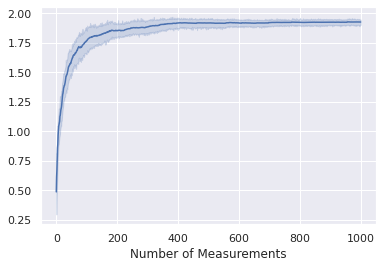

In [111]:
plt.xlabel("Number of Measurements")
sbs.lineplot(measurements, loss, ci=100)